In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline  

### Load the data

In [14]:
data = pd.read_csv("data/ex1data1.txt", header=None)

In [18]:
data.columns = ['population', 'profit']

In [20]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


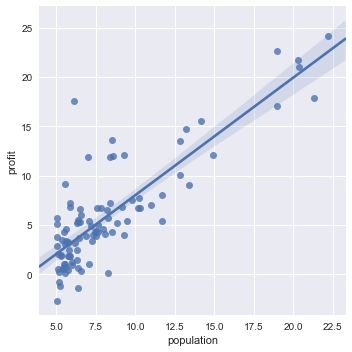

In [30]:
sns.lmplot(x='population', y='profit',data=data)

In [32]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


The range of features are not too different

###### Cost Function
<img src="img/costFunction.png">


In [110]:
def h(theta, X):
    return np.dot(X,theta)

def cost_function(theta, features, labels):
    """
    >>>cost_function([1,1,1], [[1,2],[2,3]], [1, 2])
    6.25
    
    """
    theta = np.array(theta)
    features = np.array(features)
    labels = np.array(labels)
        
    m = features.shape[0]
    X = np.c_[np.ones(m), features]
    hx = h(theta, X)
    sq = np.square(hx-labels)
    return sq.sum()/(2*m)

Setting a 'theta' it's possible to see if we have a convex function

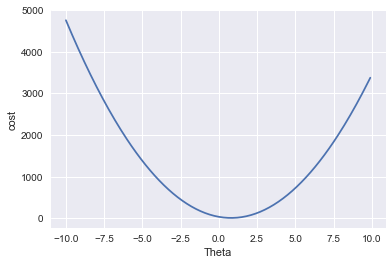

In [141]:
theta = np.arange(-10,10,0.1)
thetas = np.c_[np.zeros(len(theta)), theta]
J = [cost_function(theta, data['population'], data['profit']) for theta in thetas]
plt.plot(thetas[:,1], J)
plt.xlabel('Theta')
plt.ylabel('cost')
plt.show()

#### Gradient Descent
<img src="img/gradientDescent.png">

In [385]:
def next_thetas(theta, alpha, features, label):
    m = features.shape[0]
    X = np.c_[np.ones(m), features]

    return theta - alpha/m*((h(theta, X)-label).T).dot(X)


#### Linear Regression

In [479]:
%%time
features = data['population']
label = data['profit']
i = 0
thetas = [1 , 1] 
alpha = 0.01
Js = []
Jb = 100
J = 10
while(i<1e4 and abs(J-Jb)>1e-5):
    thetas = next_thetas(thetas, alpha, features, label)
    Jb = J
    J = cost_function(thetas, features, label)
    Js.append(J)
    i += 1

Wall time: 978 ms


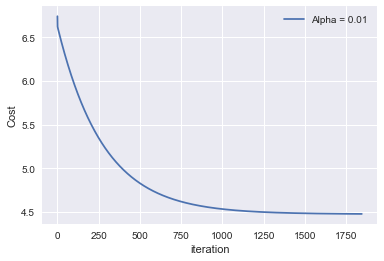

In [480]:
plt.plot(range(i), Js)
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.legend(["Alpha = "+ str(alpha)])
plt.show()

##### Normal Equations
<img src="img/normal.png">

In [481]:
def normal(features, label):
    m = features.shape[0]
    X = np.c_[np.ones(m), features]
    return (np.linalg.inv(X.T.dot(X))).dot(X.T.dot(label))

In [484]:
%%time
thetas_n = normal(features, label)

Wall time: 1e+03 µs


In [488]:
J_n = cost_function(thetas_n, features, label)
print('G. D.: ' + str(thetas) + '\n' + 'N. E.: ' + str(thetas_n))
print('Cost G. D.: ' + str(J) + '\n' + 'Cost N. E.: ' + str(J_n))

G. D.: [-3.72171291  1.17554663]
N. E.: [-3.89578088  1.19303364]
Cost G. D.: 4.47972983901
Cost N. E.: 4.47697137598


In [528]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X[:,1].reshape(-1,1), label.ravel())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

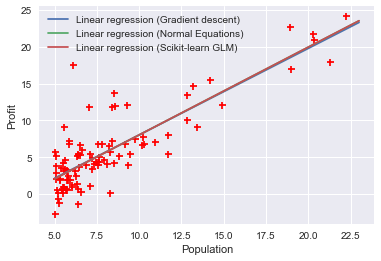

In [532]:
plt.scatter(features, label,c='r', marker='+')
plt.plot([5,23], h(thetas, [[1,5],[1,23]]))
plt.plot([5,23], h(thetas_n, [[1,5],[1,23]]))
plt.plot([5,23], h([reg.intercept_,reg.coef_], [[1,5],[1,23]]))

plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(['Linear regression (Gradient descent)',
            'Linear regression (Normal Equations)', 
            'Linear regression (Scikit-learn GLM)'])

plt.show()

# Second Problem: more dimensions (two features)

In [534]:
data = pd.read_csv("data/ex1data2.txt", header=None)

In [536]:
data.columns = ['size','n_of_bedrooms', 'price']
data.head(3)

,size,n_of_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
